In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Red_Wine Project.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["quality"]=LE.fit_transform(df["quality"])

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

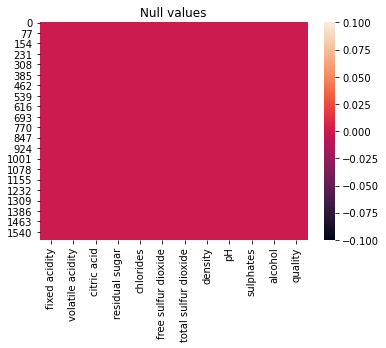

In [9]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There are no null values in the dataset.

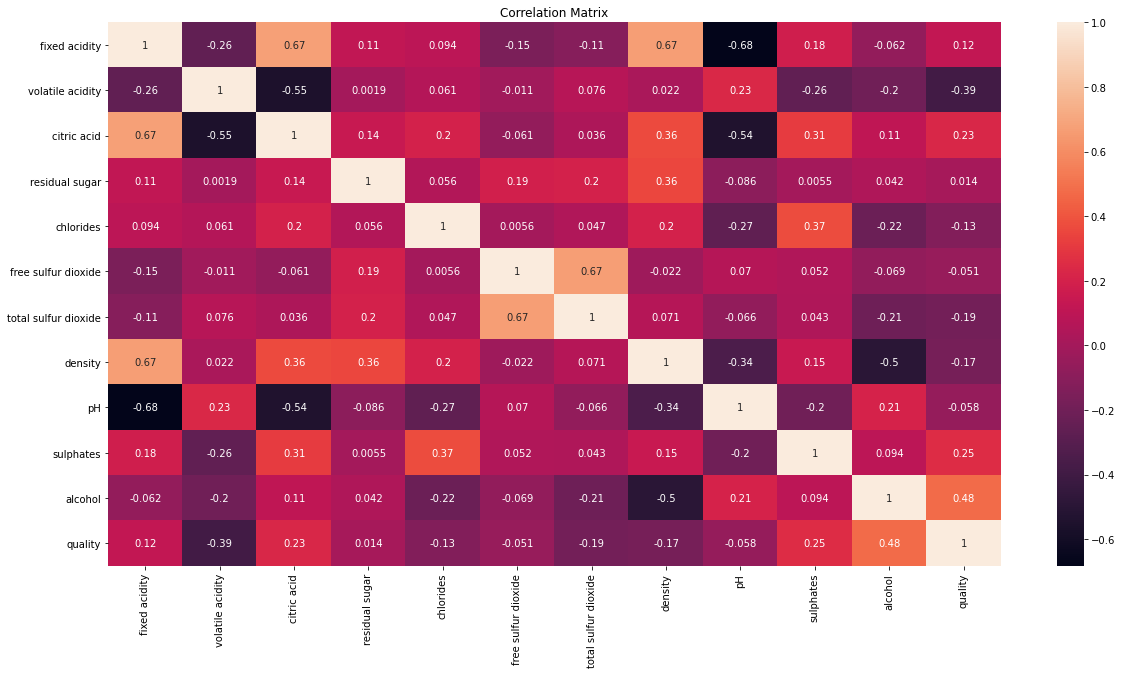

In [10]:
corr_mat=df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
corr_matrix=df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [12]:
x= df.drop("quality",axis=1)
y= df["quality"]

In [13]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [14]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [15]:
df_new.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [16]:
x=df_new

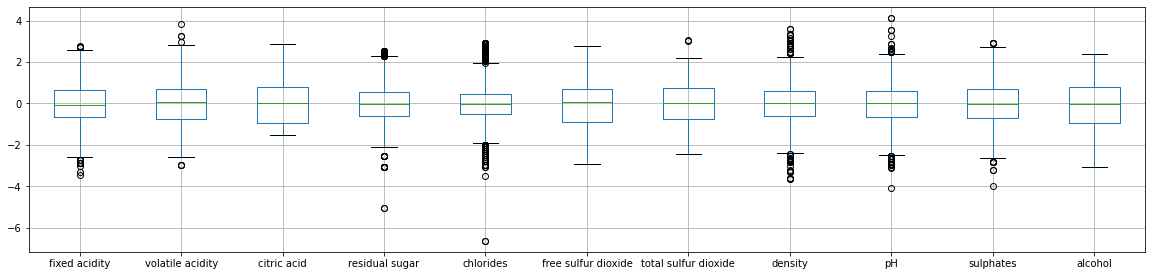

In [17]:
x.iloc[:,0:12].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

In [18]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([   7,   45,   45,   95,   95,  126,  127,  151,  170,  198,  354,
         442,  469,  480,  517,  544,  544,  554,  555,  557,  608,  614,
         695,  695,  797,  836,  836,  837,  837,  889,  909,  914, 1017,
        1017, 1018, 1018, 1081, 1114, 1269, 1270, 1287, 1299, 1316, 1316,
        1321, 1321, 1369, 1374, 1434, 1435, 1571], dtype=int64),
 array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  7,  3,  7, 10,  8, 10,
         7,  7,  7,  7,  8,  4,  8,  4,  4,  7,  4,  7,  7,  3,  3,  3,  7,
         3,  7,  6,  7,  7,  7,  9,  1,  3,  8,  3,  8,  9,  3,  7,  7,  4],
       dtype=int64))

In [19]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [20]:
df_new_z.shape

(1558, 12)

In [21]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.58125 on Random_state 1
Best accuracy is 0.6041666666666666 on Random_state 3
Best accuracy is 0.6166666666666667 on Random_state 5
Best accuracy is 0.6208333333333333 on Random_state 11
Best accuracy is 0.6354166666666666 on Random_state 17


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=17)

In [23]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.6354166666666666
[[  1   0   1   1   0   0]
 [  0   0  17   3   0   0]
 [  0   1 160  35   3   0]
 [  2   0  65 119   9   1]
 [  0   0   2  28  25   0]
 [  0   0   0   4   3   0]]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00        20
           2       0.65      0.80      0.72       199
           3       0.63      0.61      0.62       196
           4       0.62      0.45      0.53        55
           5       0.00      0.00      0.00         7

    accuracy                           0.64       480
   macro avg       0.37      0.37      0.37       480
weighted avg       0.60      0.64      0.61       480



In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6208333333333333
[[  0   0   3   0   0   0]
 [  0   1  12   6   1   0]
 [  0   9 145  42   3   0]
 [  1   9  42 122  20   2]
 [  0   1   4  19  29   2]
 [  0   0   0   4   2   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.05      0.05      0.05        20
           2       0.70      0.73      0.72       199
           3       0.63      0.62      0.63       196
           4       0.53      0.53      0.53        55
           5       0.20      0.14      0.17         7

    accuracy                           0.62       480
   macro avg       0.35      0.35      0.35       480
weighted avg       0.62      0.62      0.62       480



In [25]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6770833333333334
[[  0   1   2   0   0   0]
 [  0   0  14   6   0   0]
 [  0   0 159  39   1   0]
 [  0   0  46 141   9   0]
 [  0   0   2  28  24   1]
 [  0   0   0   5   1   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        20
           2       0.71      0.80      0.75       199
           3       0.64      0.72      0.68       196
           4       0.69      0.44      0.53        55
           5       0.50      0.14      0.22         7

    accuracy                           0.68       480
   macro avg       0.42      0.35      0.36       480
weighted avg       0.64      0.68      0.65       480



In [26]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

0.63125
[[  0   0   2   1   0   0]
 [  0   0  15   5   0   0]
 [  0   0 161  36   2   0]
 [  0   0  64 124   8   0]
 [  0   0   2  35  18   0]
 [  0   0   0   4   3   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        20
           2       0.66      0.81      0.73       199
           3       0.60      0.63      0.62       196
           4       0.58      0.33      0.42        55
           5       0.00      0.00      0.00         7

    accuracy                           0.63       480
   macro avg       0.31      0.29      0.29       480
weighted avg       0.59      0.63      0.60       480



We are getting highest accuracy with RandomForestClassifier (67%) but it can be due to overfitting also so we will check cross validation scores

In [27]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of LogisticRegression model : ",scr.mean())

Cross validation score of LogisticRegression model :  0.5703879310344828


In [28]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of DecisionTressClassifier model : ",scr.mean())

Cross validation score of DecisionTressClassifier model :  0.4871610501567399


In [29]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of RandomForestClassifier model : ",scr.mean())

Cross validation score of RandomForestClassifier model :  0.5678605015673981


In [30]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model : ",scr.mean())

Cross validation score of SVC model :  0.567862460815047


Minimum difference in accuracy  and cross validation score is for SVC (6) so this is our best model.

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn import svm, datasets
parameters = {'kernel':['linear', 'rbf'],'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [34]:
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [35]:
sv=svm.SVC(kernel='rbf',C=10)
sv.fit(x_train,y_train)

SVC(C=10)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {
    'criterion': ['gini', 'entropy']
}


gd_sr = GridSearchCV(estimator=dtc,
                    param_grid=grid_param,
                    scoring='accuracy',
                    cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.5880204996796925


In [37]:
import joblib
joblib.dump(best_result,"RedWineModelSVC.pkl")

['RedWineModelSVC.pkl']